#### Importing Essential Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

#### Importing the Datasets:

In [3]:
sales_df = pd.read_csv('orders_2016-2020_Dataset.csv')
cus_df = pd.read_csv('Customer_data.csv')

In [3]:
sales_df.head(3)

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,Tax Method,Coupon Code Name,Discount,Billing Name,Billing Country,Billing Street Address,Billing Street Address 2,Billing City,Billing State,Billing Zip,Shipping Name,Shipping Country,Shipping Street Address,Shipping Street Address 2,Shipping City,Shipping State,Shipping Zip,Gift Cards,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,NaN,NaN,₹ 0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neetu Yadav,IND,"Sec-86 nawada fatehpur, postoffice-Sikanderpur...",NaN,Gurgaon,IN-HR,122004,NaN,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,NaN,NaN,₹ 0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lucky Koli,IND,Nashik,Nashik,Maharashtra,IN-AN,422007,NaN,NaN,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,NaN,NaN,₹ 0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Raghu A,IND,Madhuranagar 2nd stage hostel,Rbw apartment,Bangalore,IN-KA,560087,NaN,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical


In [4]:
cus_df.head(3)

,product_name,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),Toys & Games,Reviewd,5.0 star rating
2,Sony PlayStation PS3 Console Slim 320 GB (Black),Toys & Games,Reviewd,4.9 star rating


### Essential Exploratory Data Analysis (EDA) on the Datasets

In [5]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1381 non-null   object
 1   category      1381 non-null   object
 2   status        490 non-null    object
 3   stars         490 non-null    object
dtypes: object(4)
memory usage: 43.3+ KB


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order #                          2297 non-null   object 
 1   Order Date and Time Stamp        2297 non-null   object 
 2   Fulfillment Status               2297 non-null   object 
 3   Payment Status                   2297 non-null   object 
 4   Payment Date and Time Stamp      240 non-null    object 
 5   Fulfillment Date and Time Stamp  229 non-null    object 
 6   Currency                         2297 non-null   object 
 7   Subtotal                         2297 non-null   object 
 8   Shipping Method                  2297 non-null   object 
 9   Shipping Cost                    2297 non-null   object 
 10  Tax Method                       1 non-null      object 
 11  Coupon Code Name                 157 non-null    object 
 12  Discount            

In [4]:
# Drop unnecessary columns from the 'sales_df' DataFrame

sales_df.drop(columns=['Coupon Code Name', 'Tax Method', 'Currency', 'Billing Street Address 2', 'Gift Cards', 'Special Instructions', 'Tracking #', 'LineItem Add-ons', 'LineItem Options'], inplace=True)

In [5]:
# Fill missing values in the 'sales_df' DataFrame with empty strings (' ') to handle any NaN or null values.

sales_df = sales_df.fillna(' ')

In [6]:
# Funtion to extracts a datetime string in the format 'dd-mm-yyyy hh:mm:ss' from the input string 's'.

def extract_datetime(s):

    pattern = '(\d{1,2}-\d{1,2}-\d{4}\s\d{2}:\d{2}:\d{2})'
    match = re.search(pattern, s)

    return match.group(0)

In [7]:
# Apply the 'extract_datetime' function to the 'Order Date and Time Stamp' column in the 'sales_df' DataFrame.

sales_df['Order Date and Time Stamp'] = sales_df['Order Date and Time Stamp'].apply(extract_datetime)

In [8]:
# Convert the 'Order Date and Time Stamp' column in the 'sales_df' DataFrame to datetime format,

sales_df['Order Date and Time Stamp'] = pd.to_datetime(sales_df['Order Date and Time Stamp'], format='%d-%m-%Y %H:%M:%S')

In [9]:
# Extract year, month, and day of the week information from the 'Order Date and Time Stamp' column

sales_df['Oder Year'] = sales_df['Order Date and Time Stamp'].dt.year
sales_df['Month'] = sales_df['Order Date and Time Stamp'].dt.month 
sales_df['Day of Week'] = sales_df['Order Date and Time Stamp'].dt.day_of_week

In [15]:
sales_df.sample(2)

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Subtotal,Shipping Method,Shipping Cost,Discount,Billing Name,Billing Country,Billing Street Address,Billing City,Billing State,Billing Zip,Shipping Name,Shipping Country,Shipping Street Address,Shipping Street Address 2,Shipping City,Shipping State,Shipping Zip,Payment Method,LineItem Name,LineItem SKU,LineItem Qty,LineItem Sale Price,LineItem Type,Oder Year,Month,Day of Week
1522,R070610860,2020-04-22 12:27:43,Unfulfilled,Unpaid,,,"₹ 6,999.00",Ships Free,₹ 0.00,₹ -50.00,,,,,,,K.murali Dharan,IND,"No.3/2, Johanan lane street, Pattinapakkam man...",Amma hotel back side,Chennai,IN-TN,600028,,Sony PlayStation 2 Gaming Console PS2 150 GB H...,PL000987,1,"₹ 6,999.00",physical,2020,4,2
1994,R188001971,2018-07-28 14:02:48,Cancelled,Unpaid,,,₹ 449.00,Ships Free,₹ 0.00,₹ 0.00,,,,,,,Alok Shaer,IND,"House no .19 ,New extension",Arakere,Tumkur,IN-KA,572106,,JBL Tempo On-Ear Headphone,PL000157,1,₹ 449.00,physical,2018,7,5


In [10]:
# Funtion to extracts a numerical string from the input string 's'

def extract_number(s):

    pattern = '(\d+,*.*)'
    match = re.search(pattern, s)

    return match.group(0)

In [11]:
int_col = ['Subtotal', 'Shipping Cost', 'Discount', 'LineItem Sale Price']

for col in int_col:
    sales_df[col] = sales_df[col].apply(extract_number)                    # apply the 'extract_number' function to extract numerical strings.
    sales_df[col] = sales_df[col].str.replace(',','').astype('float')      # Remove commas and convert the column to a float data type.

In [12]:
def extract_pay_mode(s):

    pattern = '\w*\s*\w*'
    match = re.search(pattern, s)

    return match.group(0)

sales_df['Pay_mode'] = sales_df['Payment Method'].apply(extract_pay_mode)


In [13]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Order #                          2297 non-null   object        
 1   Order Date and Time Stamp        2297 non-null   datetime64[ns]
 2   Fulfillment Status               2297 non-null   object        
 3   Payment Status                   2297 non-null   object        
 4   Payment Date and Time Stamp      2297 non-null   object        
 5   Fulfillment Date and Time Stamp  2297 non-null   object        
 6   Subtotal                         2297 non-null   float64       
 7   Shipping Method                  2297 non-null   object        
 8   Shipping Cost                    2297 non-null   float64       
 9   Discount                         2297 non-null   float64       
 10  Billing Name                     2297 non-null   object     

In [14]:
# Clean and convert the 'stars' column in 'cus_df' to a numeric format.

cus_df['stars'] = cus_df['stars'].str.replace('star rating', '').astype('float')

In [15]:
# Creating a new 'rating_group' column in 'cus_df' based on the specified conditions and groups.

conditions = [
    (cus_df['stars'] >= 1) & (cus_df['stars'] <= 2.5),
    (cus_df['stars'] > 2.5) & (cus_df['stars'] <= 3.5),
    (cus_df['stars'] > 3.5) & (cus_df['stars'] <= 4.5),
    (cus_df['stars'] > 4.5) 
]

rating_group = ['1 - 2.5', '2.6 - 3.5', '3.6 - 4.5', '> 4.5']

cus_df['rating_group'] = np.select(conditions, rating_group, default='Unkown')

In [40]:
cus_df.head(3)

,product_name,category,status,stars,rating_group
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,Toys & Games,Reviewd,5.0,> 4.5
1,Vmax HX 750 Quadcopter Drone (No Camera),Toys & Games,Reviewd,5.0,> 4.5
2,Sony PlayStation PS3 Console Slim 320 GB (Black),Toys & Games,Reviewd,4.9,> 4.5


### 1. Analysis of Reviews given by Customers

In [16]:
ratings = cus_df['rating_group'].value_counts()
ratings = ratings[1:]

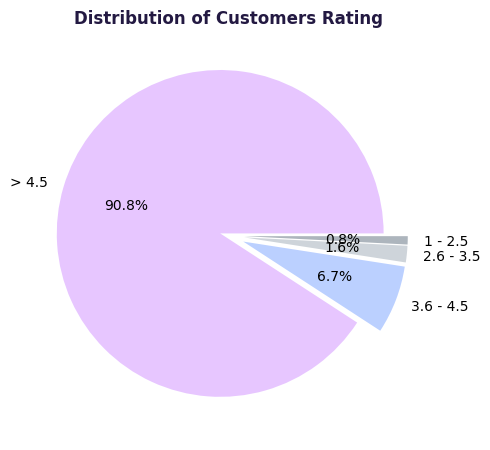

In [17]:
# Visualize the distribution of customer ratings

plt.figure(figsize=(5,5))
explode = (0.05, 0.1, 0.1, 0.1)
colors = ['#e7c6ff', '#bbd0ff', '#ced4da', '#adb5bd']
plt.pie(ratings, labels=ratings.index, autopct='%2.1f%%', explode=explode, colors=colors)
plt.title("Distribution of Customers Rating", fontdict={'color' : '#231942', 'weight' : 'bold'})

plt.tight_layout()
plt.show()

### 2. Analyzing the usage of various payment methods by customers

In [382]:
pay_mode = sales_df['Pay_mode'].value_counts()
pay_mode = pay_mode[1:].reset_index()
pay_mode.rename(columns={'count' : 'Total Orders'}, inplace=True)

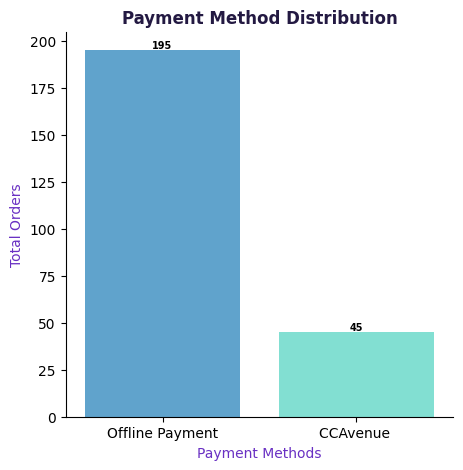

In [383]:
# Visualizing the distribution of payment methods used by customers through a bar plot

plt.figure(figsize=(5,5))

sns.barplot(x='Pay_mode', y='Total Orders', data=pay_mode, palette = ['#4ea8de', '#72efdd'])
plt.title("Payment Method Distribution", fontdict={'color' : '#231942', 'weight' : 'bold'})
plt.xlabel('Payment Methods', color='#6930c3')
plt.ylabel('Total Orders', color='#6930c3')

# Adding Data labels
for i, value in enumerate(pay_mode['Total Orders']):
    plt.text(pay_mode['Pay_mode'][i], value, str(value), ha='center', va='bottom', fontdict={'fontsize' : 7, 'weight' : 'bold'})

sns.despine()
plt.show()

### 3. Analyzing the top consumer states in India

In [162]:
top_consumer_sates = sales_df['Shipping State'].value_counts().head(12).reset_index()

In [163]:
state_mapping = {
    'TN': 'Tamil Nadu',
    'MH': 'Maharashtra',
    'UP': 'Uttar Pradesh',
    'KA': 'Karnataka',
    'AN': 'Andaman&Nicobar',
    'AP': 'Andhra Pradesh',
    'TG': 'Telangana',
    'WB': 'West Bengal',
    'BR': 'Bihar',
    'MP': 'Madhya Pradesh',
    'GJ': 'Gujarat',
    'DL': 'Delhi',
}

top_consumer_sates['Shipping State'] = top_consumer_sates['Shipping State'].str.split('-', expand=True)[1].map(state_mapping)

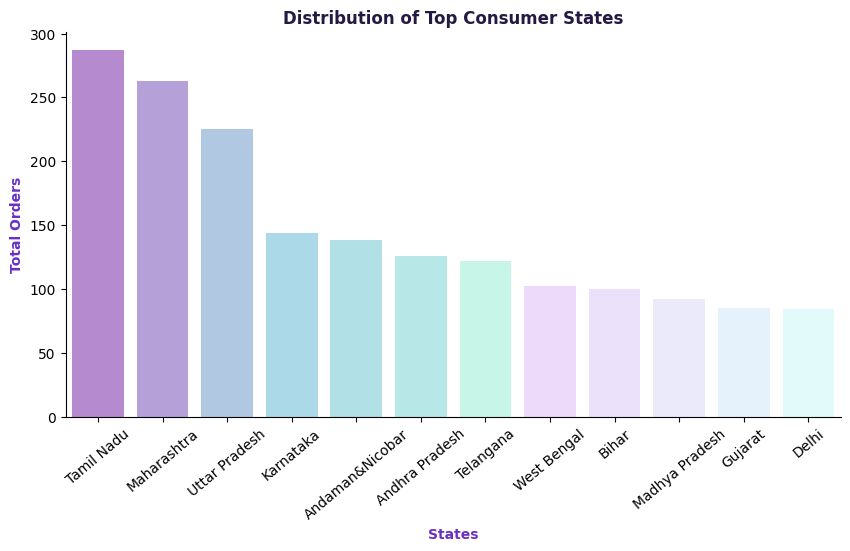

In [182]:
# Visualizing the distribution of top consumer states in India through a bar plot

colors = ['#7400b8', '#6930c3', '#5390d9', '#48bfe3', '#56cfe1', '#64dfdf', '#80ffdb', '#deaaff', '#d8bbff', '#d0d1ff', '#c8e7ff', '#c0fdff']
plt.figure(figsize=(10,5))
sns.barplot(x='Shipping State', y='count', data=top_consumer_sates, palette=colors, alpha=0.5)
plt.title('Distribution of Top Consumer States', fontdict={'color' : '#231942', 'weight' : 'bold'})
plt.xlabel('States', fontdict={'color' : '#6930c3', 'weight' : 'bold'})
plt.ylabel('Total Orders', fontdict={'color' : '#6930c3', 'weight' : 'bold'})
plt.xticks(rotation=40)

sns.despine()
plt.show()

### 4. Analyze the distribution of top consumer Cities in India 

In [194]:
top_consumer_cities = sales_df['Shipping City'].value_counts().sort_values(ascending=False).head(12)
top_consumer_cities = top_consumer_cities.reset_index()
top_consumer_cities

,Shipping City,count
0,Chennai,81
1,Bangalore,54
2,Hyderabad,50
3,Mumbai,44
4,Varanasi,41
5,Pune,29
6,chennai,29
7,Gorakhpur,22
8,Delhi,21
9,Kolkata,21


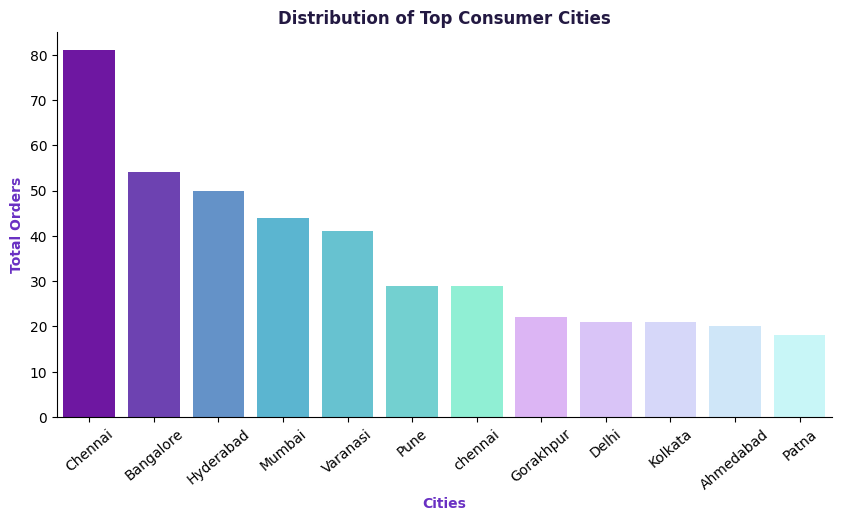

In [199]:
# Visualizing the distribution of top consumer Cities in India through a bar plot

colors = ['#7400b8', '#6930c3', '#5390d9', '#48bfe3', '#56cfe1', '#64dfdf', '#80ffdb', '#deaaff', '#d8bbff', '#d0d1ff', '#c8e7ff', '#c0fdff']
plt.figure(figsize=(10,5))
sns.barplot(x='Shipping City', y='count', data=top_consumer_cities, palette=colors)
plt.title('Distribution of Top Consumer Cities', fontdict={'color' : '#231942', 'weight' : 'bold'})
plt.xlabel('Cities', fontdict={'color' : '#6930c3', 'weight' : 'bold'})
plt.ylabel('Total Orders', fontdict={'color' : '#6930c3', 'weight' : 'bold'})
plt.xticks(rotation=40)

sns.despine()
plt.show()

### 5. Analyzing the top-selling product categories

In [214]:
Top_selling_product_category = cus_df['category'].value_counts().sort_values(ascending=False).reset_index().head(10)
Top_selling_product_category

,category,count
0,Mobiles,162
1,Accessories,106
2,Headphones,90
3,Toys & Games,87
4,Fashion,69
5,Mobiles Accessories,68
6,Laptops,64
7,Laptop Accessories,56
8,Computers Accessories,50
9,Gaming Accessories,48


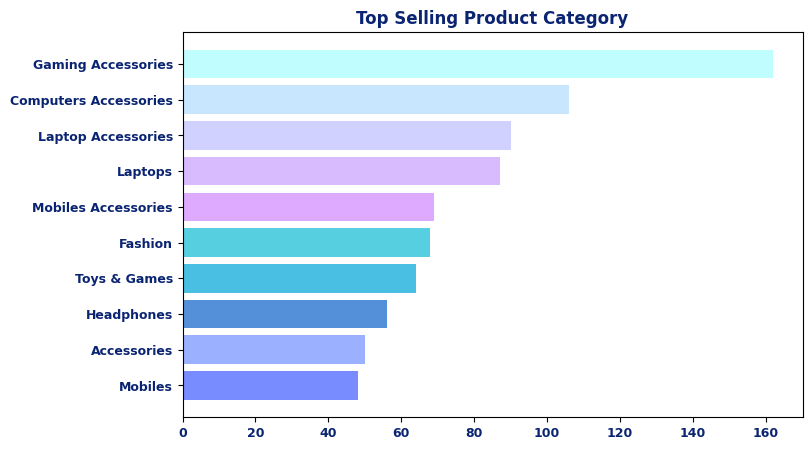

In [248]:
# Visualizing the top-selling product categories through a horizontal bar plot

colors = ['#788bff', '#9bb1ff', '#5390d9', '#48bfe3', '#56cfe1', '#deaaff', '#d8bbff', '#d0d1ff', '#c8e7ff', '#c0fdff']
plt.figure(figsize=(8,5))

plt.barh(Top_selling_product_category['category'], Top_selling_product_category['count'].sort_values(ascending=True), color=colors)
plt.title('Top Selling Product Category', fontdict={'color' : '#0a2472', 'weight' : 'bold'})
plt.xticks(fontweight='bold', fontsize=9, color='#0a2472')
plt.yticks(fontweight='bold', fontsize=9, color='#0a2472')

plt.show()

### 6. Analyzing customer reviews across all product categories

In [256]:
product_reviewed = cus_df.groupby('category')['status'].value_counts().sort_values(ascending=False).reset_index().head(6)
product_reviewed

,category,status,count
0,Mobiles,Reviewd,56
1,Toys & Games,Reviewd,34
2,Headphones,Reviewd,34
3,Accessories,Reviewd,25
4,Fashion,Reviewd,25
5,Personal Care,Reviewd,20


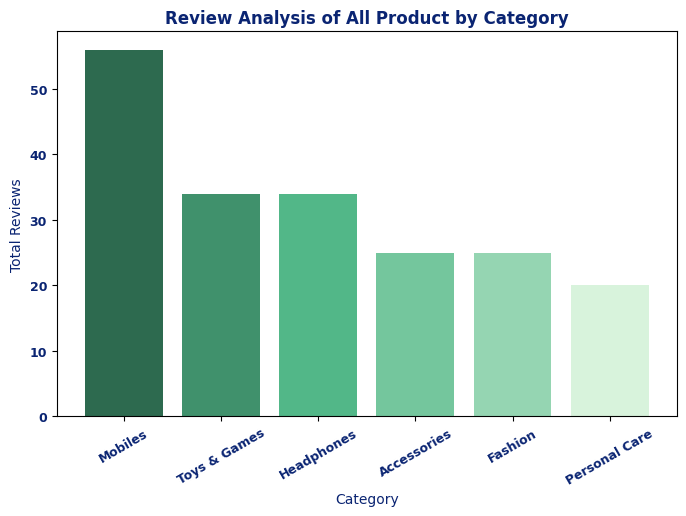

In [270]:
# Analyzing product reviews across all categories through a bar plot

colors = ['#2d6a4f', '#40916c', '#52b788', '#74c69d', '#95d5b2', '#d8f3dc']
plt.figure(figsize=(8,5))

plt.bar(product_reviewed['category'], product_reviewed['count'], color=colors)
plt.title('Review Analysis of All Product by Category', fontdict={'color' : '#0a2472', 'weight' : 'bold'})
plt.xlabel("Category", fontdict={'color' : '#0a2472'})
plt.ylabel("Total Reviews", fontdict={'color' : '#0a2472'})
plt.xticks(fontweight='bold', fontsize=9, color='#0a2472')
plt.yticks(fontweight='bold', fontsize=9, color='#0a2472')
plt.xticks(rotation=30)

plt.show()

### 7. Analyzing the number of orders per year

In [18]:
total_orders_year = sales_df.groupby('Oder Year')['Order #'].count().reset_index()

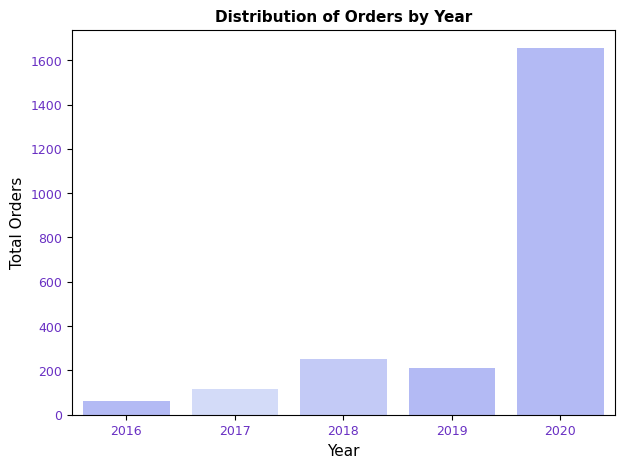

In [19]:
# Visualizing the distribution of orders per year through a bar plot

plt.figure(figsize=(7,5))
sns.barplot(x=total_orders_year['Oder Year'], y=total_orders_year['Order #'], data=total_orders_year, palette=['#5465ff','#9bb1ff','#788bff','#5465ff'], alpha=0.5)

plt.title('Distribution of Orders by Year', fontdict={'fontsize': 11, 'weight' : 'bold'})
plt.xlabel('Year', fontdict={'fontsize': 11})
plt.ylabel('Total Orders', fontdict={'fontsize': 11})
plt.xticks(color='#6930c3', fontsize=9)
plt.yticks(color='#6930c3', fontsize=9)
# sns.despine()
plt.show()

### 8. Analyzing the number of orders per Month

In [371]:
total_orders = sales_df.groupby('Month')['Order #'].count().reset_index()

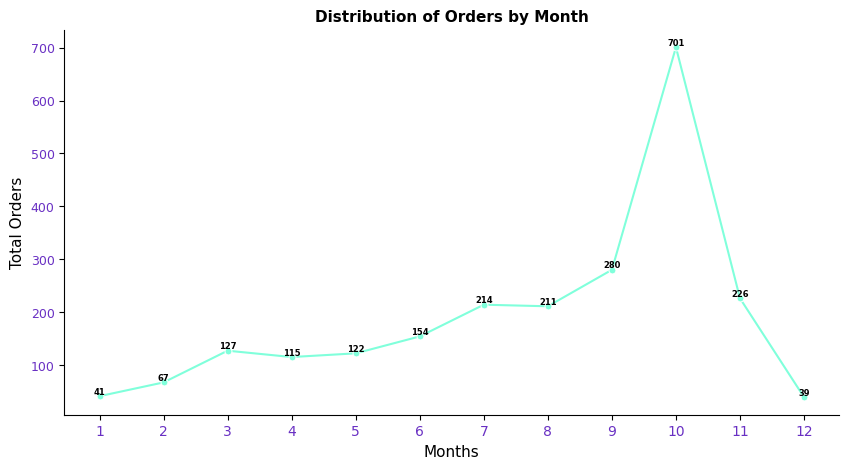

In [372]:
# Visualizing the distribution of orders per Month through a bar plot

plt.figure(figsize=(10,5))
sns.lineplot(x=total_orders['Month'], y=total_orders['Order #'], data=total_orders, color='#80ffdb', marker='o', markersize=5)

# Adding data labels to the line plot
for i, value in enumerate(total_orders['Order #']):
    plt.text(total_orders['Month'][i], value, str(value), ha='center', va='bottom', fontdict={'fontsize': 6, 'weight' : 'bold'})

plt.title('Distribution of Orders by Month', fontdict={'fontsize': 11, 'weight' : 'bold'})
plt.xlabel('Months', fontdict={'fontsize': 11})
plt.ylabel('Total Orders', fontdict={'fontsize': 11})
plt.xticks(np.arange(1,13), color='#6930c3', fontsize=10)
plt.yticks(color='#6930c3', fontsize=9)
sns.despine()
plt.show()

### 9. Analyzing the number of orders per Day

In [351]:
total_orders_day = sales_df.groupby('Day of Week')['Order #'].count().reset_index()

day_mapping = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}

total_orders_day['Day_name'] = total_orders_day['Day of Week'].map(day_mapping)

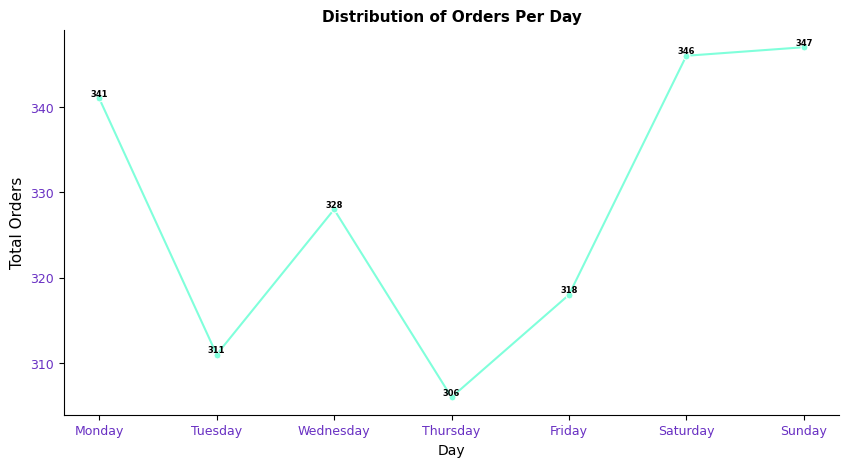

In [369]:
# Visualizing the distribution of orders on day basis through a bar plot

plt.figure(figsize=(10,5))
sns.lineplot(x=total_orders_day['Day_name'], y=total_orders_day['Order #'], data=total_orders, color='#80ffdb', marker='o', markersize='5')

# Adding data labels to the line plot
for i, value in enumerate(total_orders_day['Order #']):
    plt.text(total_orders_day['Day_name'][i], value, str(value), ha='center', va='bottom', fontdict={'fontsize': 6, 'weight' : 'bold'})

plt.title('Distribution of Orders Per Day', fontdict={'fontsize': 11, 'weight' : 'bold'})
plt.xlabel('Day', fontdict={'fontsize': 10})
plt.ylabel('Total Orders', fontdict={'fontsize': 11})
plt.xticks(color='#6930c3', fontsize=9)
plt.yticks(color='#6930c3', fontsize=9)
sns.despine()
plt.show()

### 10. What is the breakdown of payment statuses for the canceled orders, showing the count of unpaid and paid statuses?

In [39]:
canceled_orders = sales_df[sales_df['Fulfillment Status']=='Cancelled']
can_pay = canceled_orders['Payment Status'].value_counts(normalize=True)

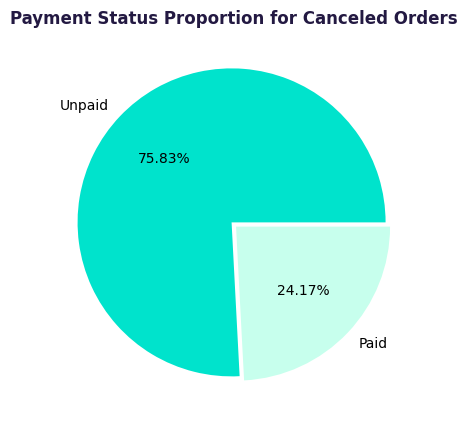

In [57]:
# visualize the proportion of payment statuses for canceled orders

plt.figure(figsize=(5,5))
explode = [0.02, 0.02]
plt.pie(can_pay, labels=can_pay.index, autopct='%1.2f%%', explode=explode, colors=['#00E3CC', '#C7FFED'])
plt.title("Payment Status Proportion for Canceled Orders", fontdict={'color' : '#231942', 'weight' : 'bold'})

plt.show()